In [2]:
import nltk
import pickle
import pandas as pd
import numpy as np
import re
import matplotlib as plt
import seaborn as sns
import string

from nltk.tokenize import word_tokenize
from nltk.corpus import	stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.lancaster import	LancasterStemmer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from scipy.linalg import svd

from sklearn.cluster import DBSCAN, SpectralClustering, MeanShift
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity


from gensim import corpora, models, similarities, matutils


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid", {'axes.grid' : False})

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

/Users/lawrencewang/anaconda3/envs/metis/lib/python3.6/site-packages/smart_open/ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')


In [3]:
with open('vectorized_subs','rb') as read_file:
    vectorized_subs = pickle.load(read_file)
with open('topics','rb') as read_file:
    topics = pickle.load(read_file)

In [3]:
vectorized_subs.head()

,ab,abandon,abil share,abl afford,abl make,abl use,abolish,abort,abroad,absolut amaz,...,youv seen,yr,yr old,yup,zealand,zip,zombi,zone,zoo,zoom
subreddit,,,,,,,,,,,,,,,,,,,,,
documentaries,0,0,0,0,0,0,0,0,3,0,...,0,1,1,0,3,0,0,0,0,0
fitness,13,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
adviceanimals,0,0,0,0,0,0,1,3,0,0,...,0,0,0,0,0,0,1,0,0,0
oddlysatisfying,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
music,0,1,1,0,0,0,0,1,2,0,...,0,0,0,0,0,1,0,0,0,0


In [5]:
topics.head()

,education,internet,politics,relationships,gaming,funny_memes,art,technology
subreddit,,,,,,,,
documentaries,0.261,0.143,0.102,0.00,0.003,0.065,0.012,0.000
fitness,0.229,0.000,0.000,0.05,0.000,0.006,0.006,0.000
adviceanimals,0.134,0.025,0.338,0.00,0.112,0.045,0.000,0.000
oddlysatisfying,0.000,0.000,0.000,0.00,0.000,0.298,0.141,0.006
music,0.057,0.201,0.014,0.00,0.001,0.137,0.010,0.000


In [12]:
topics.sort_values(by = 'politics', ascending = False)

,education,internet,politics,relationships,gaming,funny_memes,art,technology
subreddit,,,,,,,,
politics,0.000,0.079,0.626,0.000,0.000,0.000,0.000,0.000
bestof,0.000,0.183,0.521,0.000,0.063,0.000,0.000,0.026
worldnews,0.008,0.267,0.450,0.000,0.088,0.000,0.019,0.017
4chan,0.035,0.000,0.374,0.000,0.000,0.164,0.003,0.001
adviceanimals,0.134,0.025,0.338,0.000,0.112,0.045,0.000,0.000
outoftheloop,0.048,0.130,0.332,0.028,0.006,0.000,0.070,0.007
facepalm,0.060,0.000,0.313,0.000,0.000,0.019,0.000,0.000
nottheonion,0.060,0.000,0.283,0.000,0.000,0.150,0.006,0.003
news,0.110,0.292,0.282,0.000,0.000,0.032,0.000,0.102


### Finding unique word counts to determine "intelligence" of a subreddit

In [4]:
unique_words = vectorized_subs.copy()

In [5]:
cols = unique_words.columns
unique_words['unique_count'] = unique_words[cols].gt(0).sum(axis=1)

In [6]:
unique_words.unique_count

subreddit
documentaries         3746
fitness               2253
adviceanimals         2696
oddlysatisfying       1430
music                 2820
atheism               2557
sex                   3244
gonewild               717
malefashionadvice     2090
philosophy            3175
cringepics            2066
space                 2157
mildlyinteresting     1729
facepalm              2136
photoshopbattles       418
dankmemes             1153
travel                1726
lifeprotips           2953
lifehacks             1754
aww                   1553
starwars              1919
movies                2269
askscience            2522
blackpeopletwitter    2403
games                 3134
getmotivated          2369
android               2248
overwatch             1799
iama                  2859
pics                  2551
                      ... 
gaming                2324
trees                 2173
books                 3121
twoxchromosomes       2709
realgirls              769
nsfw_gif          

In [7]:
unique_words.sort_values(by=['unique_count'], ascending = False, inplace = True)

In [9]:
unique_words.index.values[0:20]

array(['blog', 'documentaries', 'askreddit', 'news', 'explainlikeimfive',
       'announcements', 'personalfinance', 'videos', 'sex', 'worldnews',
       'philosophy', 'games', 'books', 'technology', 'lifeprotips',
       'television', 'iama', 'todayilearned', 'politics', 'music'],
      dtype=object)

In [26]:
unique_words.unique_count

subreddit
blog                  3914
documentaries         3746
askreddit             3420
news                  3329
explainlikeimfive     3326
announcements         3321
personalfinance       3285
videos                3259
sex                   3244
worldnews             3176
philosophy            3175
games                 3134
books                 3121
technology            3041
lifeprotips           2953
television            2923
iama                  2859
todayilearned         2846
politics              2844
music                 2820
relationships         2814
bestof                2810
buildapc              2717
twoxchromosomes       2709
adviceanimals         2696
upliftingnews         2628
science               2622
outoftheloop          2617
showerthoughts        2583
listentothis          2579
                      ... 
overwatch             1799
gifs                  1791
woahdude              1780
lifehacks             1754
mildlyinteresting     1729
travel            

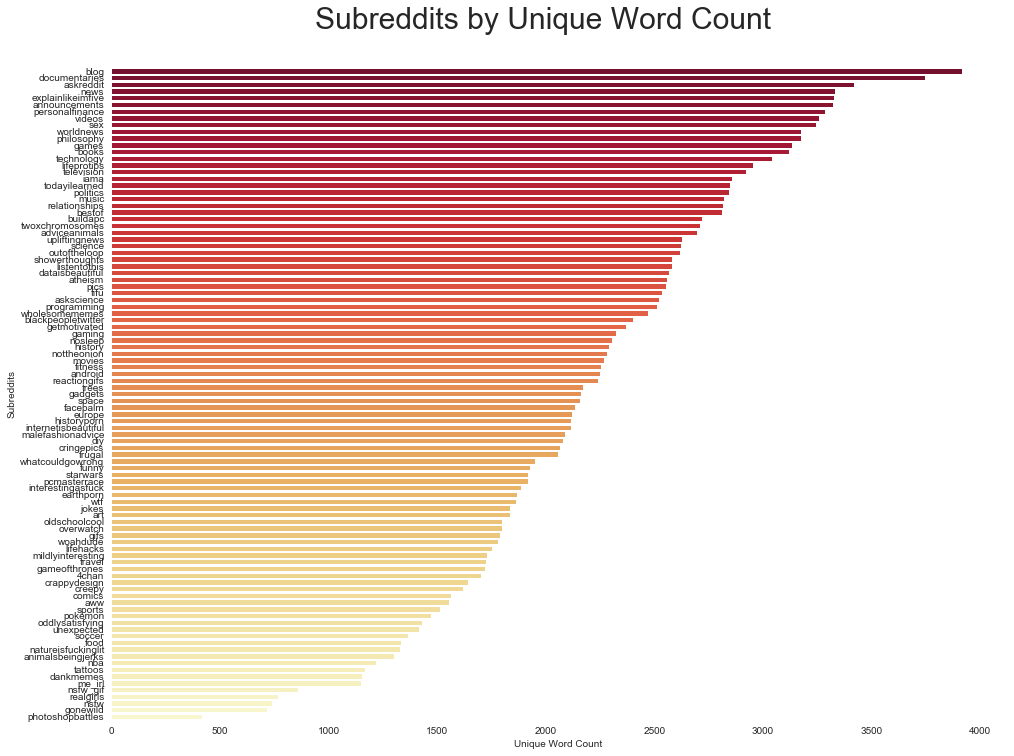

In [25]:
fig = plt.figure(figsize=(16, 12))
sns.barplot(unique_words.unique_count[0:97], unique_words.index.values[0:97], palette = 'YlOrRd_r')
plt.xlabel('Unique Word Count')
plt.ylabel('Subreddits')
fig.suptitle('Subreddits by Unique Word Count', fontsize=30, y=.95)
sns.despine(left = True, bottom = True)
# plt.yticks([])
plt.savefig("unique_words.svg", format="svg")

## Matching subreddits by cosine similarity

In [149]:
topics.iloc[0].values.reshape(1,8)[0]

array([0.261, 0.143, 0.102, 0.   , 0.003, 0.065, 0.012, 0.   ])

In [118]:
cosine_similarity(topics.iloc[0].values.reshape(1,8), topics.iloc[1].values.reshape(1,8))

array([[0.79878144]])

In [147]:
# function was never used, but it sums 3 subreddit vectors into one, and then gives recommendations based off of that
# resulting vector

# didn't know whether the sum/average of vectors represented anything significant in topic space

def cosine_matches_3(sub1, sub2, sub3):
    cosines = []
    counter = 0
    new_vector = (topics.loc[sub1].values.reshape(1,8)+topics.loc[sub2].values.reshape(1,8)+topics.loc[sub3].values.reshape(1,8))/3
    
    for index, row in topics.iterrows():
        cosines.append([index, cosine_similarity(row.values.reshape(1,8), new_vector)])
    sort_cosines = sorted(cosines, key=lambda x: x[1], reverse=True)
#     return sort_cosines[0:20]
    for item in sort_cosines:
        if counter < 5:
            print(item[0])
            counter += 1
#     return sort_cosines

In [148]:
cosine_matches_3('fitness', 'tifu', 'funny')

tifu
wholesomememes
blackpeopletwitter
malefashionadvice
movies


In [190]:
# Main recommender function to determine cosine similarity

def cosine_matches(subreddit, num_recs):
    cosines = []
    all_subs = []
    for index, row in topics.iterrows():
        cosines.append([index, cosine_similarity(row.values.reshape(1,8), topics.loc[subreddit].values.reshape(1,8))])
    sort_cosines = sorted(cosines, key=lambda x: x[1], reverse=True)
    
    for i in range(num_recs):
        all_subs.append(sort_cosines[i+1][0])
#     return sort_cosines[0:10]
    output_string = ''
    for item in all_subs:
        output_string += (item + ', ')
    return output_string[:-2]

In [201]:
cosine_matches('trees', 5)

'atheism, news, documentaries, outoftheloop, adviceanimals'